<a href="https://colab.research.google.com/github/projjal1/Neural_Networks_Projects/blob/master/Kaggle_Crop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Crop Classification Challenge ML Solution
This challenge is hosted at https://www.kaggle.com/aman2000jaiswal/agriculture-crop-images/tasks?taskId=1367&campaign=804ac1b0-8545-4bd6-a1ab-8bb2f0262f71
This challenge involves image classification of agriculture crops

In [ ]:
!pip install tensorflow-gpu

In [2]:
import os 

Using Local Version of Kaggle Dataset stored in Google Drive

In [3]:
path='drive/My Drive/Colab Notebooks/crop_img'
train_path=os.path.join(path,'kag2')
val_path=os.path.join(path,'crop_images')

label=os.listdir(train_path)

Importing modules

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Displaying information about objects contained in local dataset folders

In [5]:
def disp_info(path):
  count=0
  for x in label:
    no=len(os.listdir(os.path.join(path,x)))
    print("No. of objects in",x,"is",no)
    count+=no

  return count

Detailed info

In [6]:
print("Training data:")
total_train=disp_info(train_path)
print("Validation data:")
total_val=disp_info(val_path)

Training data:
No. of objects in maize is 159
No. of objects in sugarcane is 159
No. of objects in wheat is 162
No. of objects in rice is 159
No. of objects in jute is 159
Validation data:
No. of objects in maize is 40
No. of objects in sugarcane is 40
No. of objects in wheat is 41
No. of objects in rice is 40
No. of objects in jute is 40


# Hyperparameters
Declaring batch size, epochs, image width and height

In [34]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

#Data preparation
Format the images into appropriately pre-processed floating point tensors before feeding to the network:

Read images from the disk.
Decode contents of these images and convert it into proper grid format as per their RGB content.
Convert them into floating point tensors.
Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
Fortunately, all these tasks can be done with the ImageDataGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [35]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [36]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 798 images belonging to 5 classes.


In [37]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_path,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 201 images belonging to 5 classes.


#Create the model
The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it thatr is activated by a relu activation function. The model outputs class probabilities based on binary classification by the sigmoid activation function.

In [64]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(5, activation='sigmoid')
])

#Compile the model
For this tutorial, choose the ADAM optimizer and sparse categorical cross entropy loss function, as its a multi-label classification. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [65]:
import tensorflow as tf

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model summary
View all the layers of the network using the model's summary method:

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 20736)            

#Train the model
Use the fit_generator method of the ImageDataGenerator class to train the network.

In [67]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
6/6 [==============================] - 5s 787ms/step - loss: 1.6664 - accuracy: 0.1970 - val_loss: 1.6240 - val_accuracy: 0.2031
Epoch 2/15
6/6 [==============================] - 5s 768ms/step - loss: 1.5647 - accuracy: 0.2104 - val_loss: 1.5197 - val_accuracy: 0.3203
Epoch 3/15
6/6 [==============================] - 5s 874ms/step - loss: 1.4943 - accuracy: 0.4000 - val_loss: 1.4627 - val_accuracy: 0.4531
Epoch 4/15
6/6 [==============================] - 5s 761ms/step - loss: 1.4542 - accuracy: 0.4299 - val_loss: 1.4283 - val_accuracy: 0.4688
Epoch 5/15
6/6 [==============================] - 5s 780ms/step - loss: 1.4152 - accuracy: 0.4478 - val_loss: 1.3858 - val_accuracy: 0.4766
Epoch 6/15
6/6 [==============================] - 5s 772ms/step - loss: 1.3852 - accuracy: 0.4672 - val_loss: 1.3718 - val_accuracy: 0.4688
Epoch 7/15
6/6 [==============================] - 5s 768ms/step - loss: 1.3565 - accuracy: 0.4836 - val_loss: 1.3150 - val_accuracy: 0.5156
Epoch 8/15
6/6 [====

#Visualize training results
Now visualize the results after training the network.

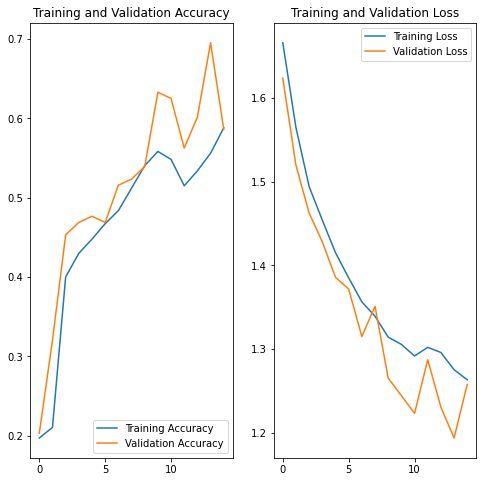

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 70% accuracy on the validation set.

Let's look at what went wrong and try to increase overall performance of the model.

#Put it all together
Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images.

In [69]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [70]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_path,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 798 images belonging to 5 classes.


In [71]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [72]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_path,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 201 images belonging to 5 classes.


#Dropout
Another technique to reduce overfitting is to introduce dropout to the network. It is a form of regularization that forces the weights in the network to take only small values, which makes the distribution of weight values more regular and the network can reduce overfitting on small training examples. Dropout is one of the regularization technique used in this tutorial

When you apply dropout to a layer it randomly drops out (set to zero) number of output units from the applied layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

When appling 0.1 dropout to a certain layer, it randomly kills 10% of the output units in each training epoch.

Create a network architecture with this new dropout feature and apply it to different convolutions and fully-connected layers.

#Creating a new network with Dropouts
Here, you apply dropout to first and last max pool layers and to a fully connected layer that has 512 output units. 30% of the first and last max pool layer, and 10% of fully connected layer output units, are randomly set to zero during each training epoch.

In [73]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='sigmoid')
])

#Compile the model
After introducing dropouts to the network, compile the model and view the layers summary.

In [74]:
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 64)       

#Train the model
After successfully introducing data augmentations to the training examples and adding dropouts to the network, train this new network:

In [76]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=40,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/40
6/6 [==============================] - 5s 761ms/step - loss: 0.8400 - accuracy: 0.6284 - val_loss: 0.8415 - val_accuracy: 0.6797
Epoch 2/40
6/6 [==============================] - 5s 778ms/step - loss: 0.8180 - accuracy: 0.6463 - val_loss: 0.7492 - val_accuracy: 0.6562
Epoch 3/40
6/6 [==============================] - 5s 783ms/step - loss: 0.8019 - accuracy: 0.6373 - val_loss: 0.6907 - val_accuracy: 0.7109
Epoch 4/40
6/6 [==============================] - 5s 765ms/step - loss: 0.7245 - accuracy: 0.7015 - val_loss: 0.7590 - val_accuracy: 0.7109
Epoch 5/40
6/6 [==============================] - 5s 766ms/step - loss: 0.7372 - accuracy: 0.7030 - val_loss: 0.7525 - val_accuracy: 0.6719
Epoch 6/40
6/6 [==============================] - 5s 778ms/step - loss: 0.7613 - accuracy: 0.6731 - val_loss: 0.6922 - val_accuracy: 0.7500
Epoch 7/40
6/6 [==============================] - 5s 768ms/step - loss: 0.7140 - accuracy: 0.6776 - val_loss: 0.7235 - val_accuracy: 0.6797
Epoch 8/40
6/6 [====

#Visualize the model
Visualize the new model after training, you can see that there is significantly less overfitting than before. The accuracy should go up after training the model for more epochs.

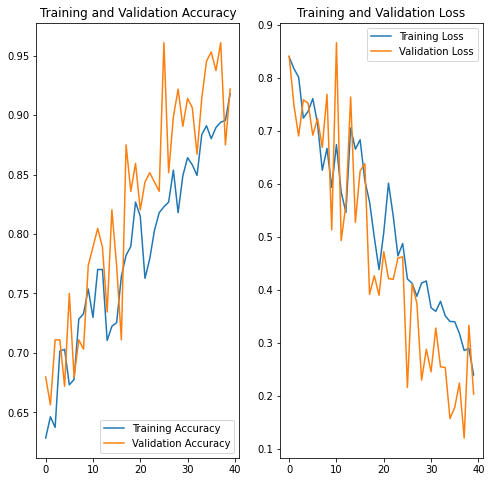

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Applying predictions on a set of images

In [79]:
import cv2

In [148]:
def predictions(dir_path):
  imdata=cv2.imread(dir_path)
  imdata=cv2.resize(imdata,(150,150))
  im_tensor=np.asarray(imdata)
  
  im_tensor=tf.expand_dims(im_tensor,0)
  print(labels[np.argmax(model.predict(im_tensor))])

In [152]:
#List of pics_paths
path='drive/My Drive/Colab Notebooks/crop_img/prediction_imgs'
os.listdir(path)

['sugarcane.jpg', 'wheat.jpg', 'rice.jpg', 'jute.jpg', 'pic1.jpg', 'maize.jpg']

In [153]:
labels=list(train_data_gen.class_indices.keys())
labels

['jute', 'maize', 'rice', 'sugarcane', 'wheat']

In [154]:
for each in os.listdir(path):
  predictions(os.path.join(path,each))

sugarcane
sugarcane
maize
jute
wheat
maize
